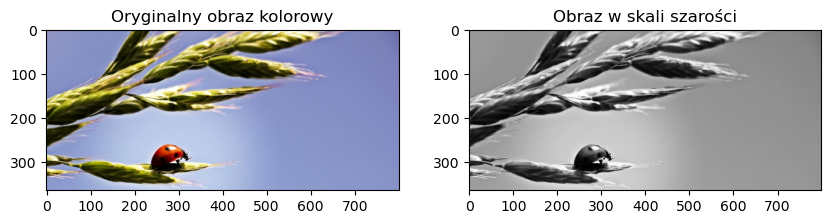

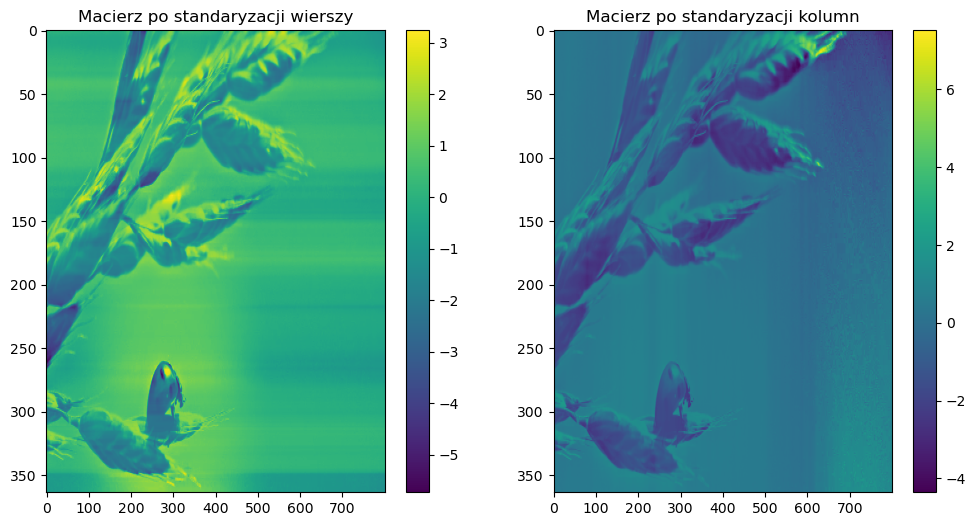


Analiza SVD dla wierszy:


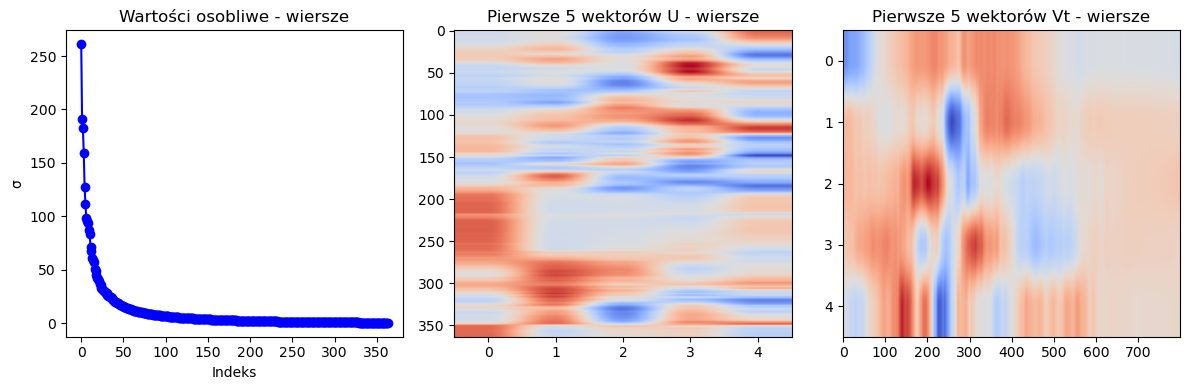


Analiza SVD dla kolumn:


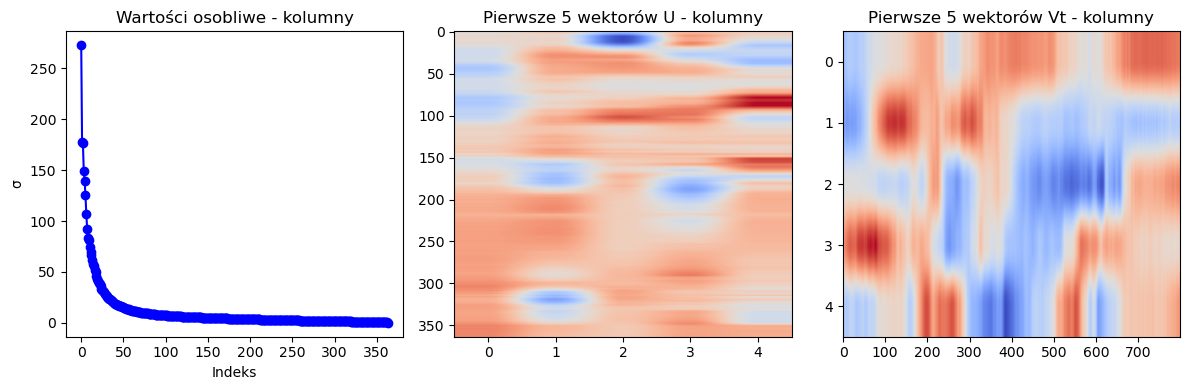

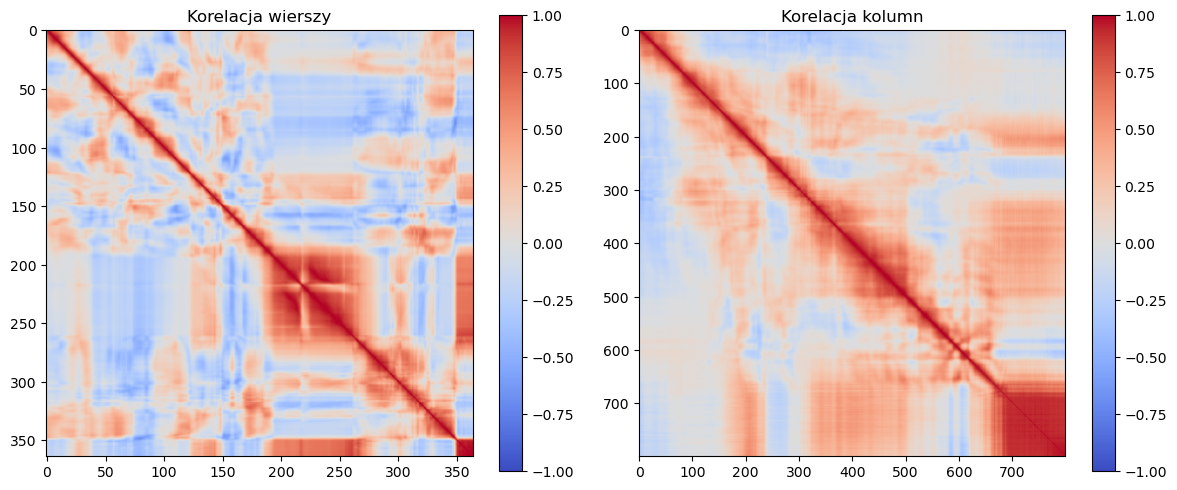

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Konfiguracja wykresów
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

# 1. Wczytanie i wyświetlenie oryginalnego obrazu
original_image = Image.open('15.webp')
gray_image = original_image.convert('L')
A = np.array(gray_image, dtype=np.float64)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Oryginalny obraz kolorowy')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Obraz w skali szarości')
plt.show()

# 2. Standaryzacja i wizualizacja
def standardize(matrix, axis):
    if axis == 'rows':
        means = matrix.mean(axis=1, keepdims=True)
        stds = matrix.std(axis=1, keepdims=True)
    else:
        means = matrix.mean(axis=0, keepdims=True)
        stds = matrix.std(axis=0, keepdims=True)
    
    stds[stds == 0] = 1e-8
    return (matrix - means) / stds

A_rows_std = standardize(A, 'rows')
A_cols_std = standardize(A, 'columns')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(A_rows_std, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Macierz po standaryzacji wierszy')

plt.subplot(1, 2, 2)
plt.imshow(A_cols_std, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Macierz po standaryzacji kolumn')
plt.show()

# 3. Rozkład SVD i wizualizacja komponentów
def svd_analysis(matrix, title):
    U, S, Vt = np.linalg.svd(matrix, full_matrices=False)
    
    # Wykres wartości osobliwych
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.plot(S, 'bo-')
    plt.title(f'Wartości osobliwe - {title}')
    plt.xlabel('Indeks')
    plt.ylabel('σ')
    
    # Pierwsze 5 wektorów lewych
    plt.subplot(1, 3, 2)
    plt.imshow(U[:, :5], cmap='coolwarm', aspect='auto')
    plt.title(f'Pierwsze 5 wektorów U - {title}')
    
    # Pierwsze 5 wektorów prawych
    plt.subplot(1, 3, 3)
    plt.imshow(Vt[:5, :], cmap='coolwarm', aspect='auto')
    plt.title(f'Pierwsze 5 wektorów Vt - {title}')
    plt.tight_layout()
    plt.show()
    
    return U, S, Vt

print("\nAnaliza SVD dla wierszy:")
U_rows, S_rows, Vt_rows = svd_analysis(A_rows_std, 'wiersze')

print("\nAnaliza SVD dla kolumn:")
U_cols, S_cols, Vt_cols = svd_analysis(A_cols_std, 'kolumny')

# Funkcja do standaryzacji i obliczania macierzy korelacji via SVD
def compute_correlation(matrix, axis):
    m, n = matrix.shape
    if axis == 'rows':
        means = matrix.mean(axis=1, keepdims=True)
        stds = matrix.std(axis=1, keepdims=True)
    else:  # columns
        means = matrix.mean(axis=0, keepdims=True)
        stds = matrix.std(axis=0, keepdims=True)
    
    # Unikaj dzielenia przez zero
    stds[stds == 0] = 1e-8
    standardized = (matrix - means) / stds
    
    # Oblicz SVD
    U, S, Vt = np.linalg.svd(standardized, full_matrices=False)
    
    # Oblicz macierz korelacji
    if axis == 'rows':
        corr = (U @ np.diag(S**2) @ U.T) / (n - 1)
    else:
        corr = (Vt.T @ np.diag(S**2) @ Vt) / (m - 1)
    
    return corr

# Oblicz macierze korelacji
row_corr = compute_correlation(A, 'rows')
col_corr = compute_correlation(A, 'columns')

# Wizualizacja
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(row_corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Korelacja wierszy')

plt.subplot(1, 2, 2)
plt.imshow(col_corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Korelacja kolumn')

plt.tight_layout()
plt.show()